# UAS KECERDASAN BUATAN
INDAH CAHYA RESTI - 09011281823046 - SK 5 B Indralaya

Referensi :

https://github.com/adashofdata/muffin-cupcake/blob/master/muffin_vs_cupcake_demo.ipynb
https://byungjun0689.github.io/5.-SVM/

Disini saya menggunakan metode svm untuk mengklasifikasikan sebuah dessert, yaitu muffin dan cupcakes. Klasifikasi ini terdapat beberapa variabel berupa ingredients (bahan-bahan yang digunakan dalam pembuatan dessert tersebut).

SVM sendiri merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi dan regresi. Dalam hal ini saya menggunakan support vector classification. Dalam pemodelan klasifikasi dengan linear, SVM memiliki konsep yang lebih matang dan matematis.
SVM berupa klasifikasi linear biner yang keputusannya dibuat secara eksplisit untuk meminimalkan kesalahan generalisasi.


###  Import packages

In [1]:
# Import package untuk analisis data yang akan diolah
import pandas as pd
import numpy as np
from sklearn import svm

# Packages untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

### Import data

In [2]:
# Membaca data bahan-bahan resep muffin dan cupcakes
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


### Menyiapkan data
Disini saya akan membagi 2 kelas/bidang(bahan).
Saya mengambil data flour(tepung) dan milk(susu).
Sumbu x adalah flour dan sumbu y adalah susu

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


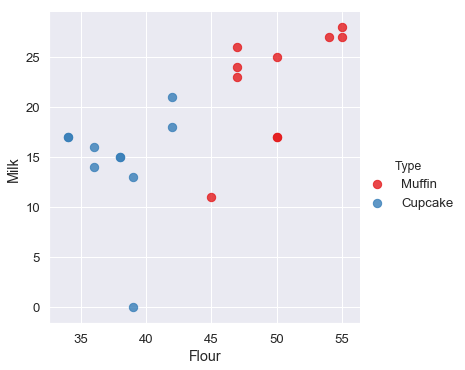

In [3]:
# Pengelompokkan 2 bahan
sns.lmplot('Flour', 'Milk', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [4]:
# Spesifikasi inputan model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Milk']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Fitur nama
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

### Pembuatan model SVM
SVM terdapat hyperplane untuk memaksimalkan jarak antar kelas dan sebagai pemisah antar kelas.

In [5]:
# Melakukan pencocokan model SVM
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Melakukan hasil berupa visualisasi data

Rumus yang digunakan :

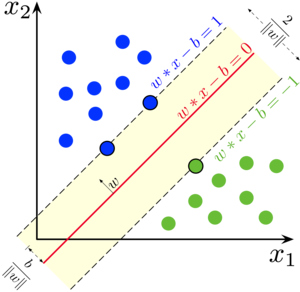

In [6]:
# Membagi 2 data
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


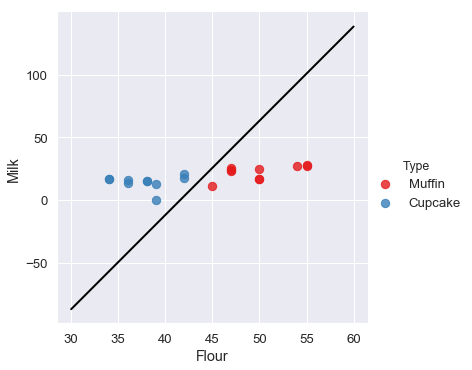

In [7]:
# Membagi data menjadi 2 class
sns.lmplot('Flour', 'Milk', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


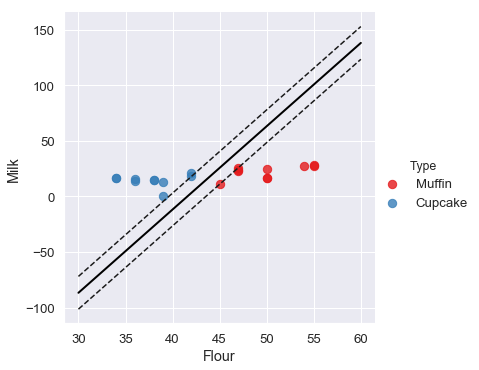

In [8]:
# Lihat margin beserta support vectornya
sns.lmplot('Flour', 'Milk', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

### Memprediksi masalah baru
Membuat fungsi untuk mengkategorikan apakah bahan yang ada termasuk resep muffin atau cupcakes

In [9]:
# Membuat fungsi untuk mengkategorikan

def muffin_or_cupcake(flour, milk):
    if(model.predict([[flour, milk]]))==0:
        print('Resep Muffin yang cocok untukmu!!')
    else:
        print('Resep cupcake yang cocok untukmu!!')

In [10]:
# Prediksi jika flour bernilai 49 dan sugar bernilai 21
muffin_or_cupcake(49, 21)

Resep Muffin yang cocok untukmu!!


C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


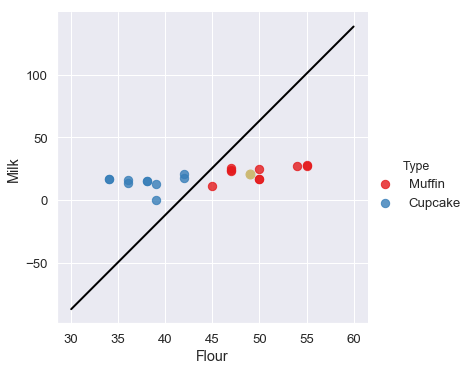

In [11]:
# Membuat visualisasi grafik untuk melihat dimana titik hasil resep berada 
sns.lmplot('Flour', 'Milk', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(49, 21, 'yo', markersize='9');

### Hasil Prediksi Flour = 49 dan Sugar = 21
Dapat kita lihat hasilnya pada grafik diatas.
Hasil prediksinya yaitu pada tanda titik yang berwarna kuning.
Titik kuning berada di daerah muffin (titik-titik merah).

Sehingga hasil prediksi ini menyatakan bahwa prediksi bahan yang diinputkan berada di resep muffin.
Bahan yang digunakan cocok untuk membuat sebuah Muffin.

### Coba case baru

In [12]:
# Prediksi jika Flour = 35 dan Sugar 23

muffin_or_cupcake(35,23)

Resep cupcake yang cocok untukmu!!


C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


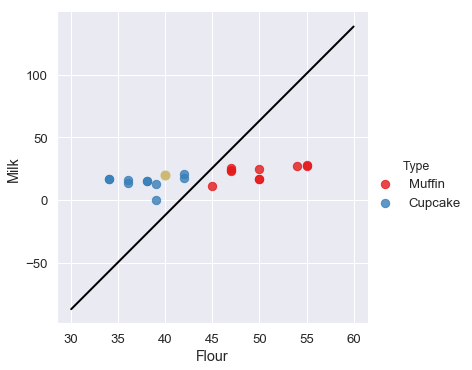

In [13]:
# Membuat visualisasi grafik untuk melihat dimana titik hasil resep berada
sns.lmplot('Flour', 'Milk', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(40, 20, 'yo', markersize='9');

### Hasil Prediksi Flour = 35 dan Sugar = 23
Dapat kita lihat hasilnya pada grafik diatas.
Hasil prediksinya yaitu pada tanda titik yang berwarna kuning.
Titik kuning berada di daerah cipcake (titik-titik biru).

Sehingga hasil prediksi ini menyatakan bahwa prediksi bahan yang diinputkan berada di resep cupcake.
Bahan yang digunakan cocok untuk membuat sebuah Cupcakes.

## Kesimpulan
SVM cocok digunakan untuk klasifikasi yang kompleks dengan data yang kecil/menengah seperti dalam menentukan resep makanan seperti yang telah dijelaskan sebelumnya.

Sekian dan terimakasih^^